In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stat
import matplotlib.pyplot as plt
import random

In [91]:
# 0.0 Titanic dataset

In [92]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [93]:
# 0.1 Data Conversion and Numerical Dataset

In [94]:
# converting class values to integer and type from category to int64
df['class'] = df['class'].replace('First', 1).replace('Second',2).replace('Third', 3)
df['class'] = df['class'].astype('int64')

In [99]:
# converting alone values to integer and type from bool to int64
df['alone'] = df['alone'].replace('True', 1).replace('False',2)
df['alone'] = df['alone'].astype('int64')

In [100]:
df_numerical = df[df.dtypes[df.dtypes != "object"].index]

In [101]:
df_numerical

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone
0,0,3,22.0,1,0,7.2500,3,True,NaN,0
1,1,1,38.0,1,0,71.2833,1,False,C,0
2,1,3,26.0,0,0,7.9250,3,False,NaN,1
3,1,1,35.0,1,0,53.1000,1,False,C,0
4,0,3,35.0,0,0,8.0500,3,True,NaN,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,True,NaN,1
887,1,1,19.0,0,0,30.0000,1,False,B,1
888,0,3,NaN,1,2,23.4500,3,False,NaN,0
889,1,1,26.0,0,0,30.0000,1,True,C,1


In [105]:
df_numerical.drop(["adult_male","deck"], axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22572\2292370039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.drop(["adult_male","deck"], axis=1, inplace=True)


In [106]:
df_numerical

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,1
887,1,1,19.0,0,0,30.0000,1,1
888,0,3,NaN,1,2,23.4500,3,0
889,1,1,26.0,0,0,30.0000,1,1


In [103]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone
0,0,3,22.0,1,0,7.2500,3,True,NaN,0
1,1,1,38.0,1,0,71.2833,1,False,C,0
2,1,3,26.0,0,0,7.9250,3,False,NaN,1
3,1,1,35.0,1,0,53.1000,1,False,C,0
4,0,3,35.0,0,0,8.0500,3,True,NaN,1


In [36]:
# 0.2 Checking dataset for NAN Values

In [37]:
df_numerical.isnull().sum()


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
class         0
alone         0
dtype: int64

In [38]:
# 0.3 Mean and Median of age

In [39]:
np.mean(df_numerical['age'])

29.69911764705882

In [40]:
np.median(df_numerical['fare'])

14.4542

In [41]:
# 0.4 Boxplot for checking outliers

<AxesSubplot:>

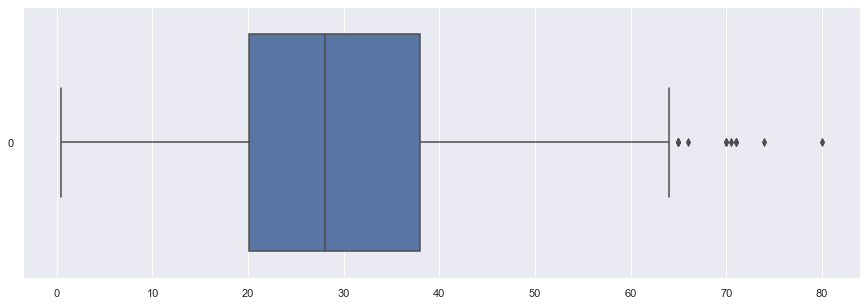

In [42]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['age'], orient="h")


In [43]:
# 0.5 Replacing NaN Values with Mean

In [44]:
df_numerical['age'].fillna(np.mean(df_numerical['age']), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22572\1010884794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['age'].fillna(np.mean(df_numerical['age']), inplace=True)


In [45]:
df_numerical['age'].isnull().sum() # no NaN values present in age column now

0

In [46]:
df_numerical.isnull().sum() # no NaN values in Numerical dataset

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
class       0
alone       0
dtype: int64

In [47]:
# 1.0 Measure of Central Tendency

In [48]:
# 1.1 Mean of all numeric columns

In [49]:
np.mean(df_numerical, axis=0)

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
class        2.308642
alone        0.602694
dtype: float64

In [50]:
# 1.2 Median of all numeric columns

In [51]:
np.median(df_numerical, axis=0)

array([ 0.        ,  3.        , 29.69911765,  0.        ,  0.        ,
       14.4542    ,  3.        ,  1.        ])

In [52]:
# 1.3 Mode of all columns

In [53]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,3,man,True,C,Southampton,no,1


In [54]:
# for individual columns
stat.mode(df['age'])

24.0

In [55]:
# 2.0 Measure of Dispersion

In [56]:
# 2.1 Variance

In [57]:
df_numerical.var()

survived       0.236772
pclass         0.699015
age          169.052400
sibsp          1.216043
parch          0.649728
fare        2469.436846
class          0.699015
alone          0.239723
dtype: float64

In [58]:
# for individual columns
stat.variance(df_numerical['age'])

169.05239993721082

In [59]:
# 2.2 Standard Deviation

In [60]:
df_numerical.std()


survived     0.486592
pclass       0.836071
age         13.002015
sibsp        1.102743
parch        0.806057
fare        49.693429
class        0.836071
alone        0.489615
dtype: float64

In [61]:
# for individual columns
stat.stdev(df_numerical['age'])

13.002015226002884

In [62]:
# 3.0 Five point summary

In [63]:
# 3.1 For survived Column

In [64]:
print("Minimum value is: {}".format(df_numerical['survived'].min())) # zeroth Percentile or minimum value
print("1st quartile is: {}".format(np.percentile(df_numerical['survived'], 25))) # 1st quartile
print("Median is: {}".format(np.percentile(df_numerical['survived'], 50))) # 2nd quartile or median
print("3rd quartile is: {}".format(np.percentile(df_numerical['survived'], 75))) # 3rd quartile
print("Maximum value is: {}".format(df_numerical['survived'].max())) # 100th Percentile or maximum value

Minimum value is: 0
1st quartile is: 0.0
Median is: 0.0
3rd quartile is: 1.0
Maximum value is: 1


In [65]:
# 3.2 For pclass Column

In [66]:
print("Minimum value is: {}".format(df_numerical['pclass'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['pclass'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['pclass'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['pclass'], 75)))
print("Maximum value is: {}".format(df_numerical['pclass'].max()))

Minimum value is: 1
1st quartile is: 2.0
Median is: 3.0
3rd quartile is: 3.0
Maximum value is: 3


In [67]:
# 3.3 For age Column

In [68]:
print("Minimum value is: {}".format(df_numerical['age'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['age'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['age'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['age'], 75)))
print("Maximum value is: {}".format(df_numerical['age'].max()))

Minimum value is: 0.42
1st quartile is: 22.0
Median is: 29.69911764705882
3rd quartile is: 35.0
Maximum value is: 80.0


In [69]:
# 3.4 For sibsp (Siblings) Column

In [70]:
print("Minimum value is: {}".format(df_numerical['sibsp'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['sibsp'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['sibsp'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['sibsp'], 75)))
print("Maximum value is: {}".format(df_numerical['sibsp'].max()))

Minimum value is: 0
1st quartile is: 0.0
Median is: 0.0
3rd quartile is: 1.0
Maximum value is: 8


In [71]:
# 3.5 For parch (parent-child) Column

In [72]:
print("Minimum value is: {}".format(df_numerical['parch'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['parch'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['parch'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['parch'], 75)))
print("Maximum value is: {}".format(df_numerical['parch'].max()))

Minimum value is: 0
1st quartile is: 0.0
Median is: 0.0
3rd quartile is: 0.0
Maximum value is: 6


In [73]:
# 3.6 For fare Column

In [74]:
print("Minimum value is: {}".format(df_numerical['fare'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['fare'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['fare'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['fare'], 75)))
print("Maximum value is: {}".format(df_numerical['fare'].max()))

Minimum value is: 0.0
1st quartile is: 7.9104
Median is: 14.4542
3rd quartile is: 31.0
Maximum value is: 512.3292


In [75]:
# 3.7 For class Column

In [76]:
print("Minimum value is: {}".format(df_numerical['class'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['class'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['class'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['class'], 75)))
print("Maximum value is: {}".format(df_numerical['class'].max()))

Minimum value is: 1
1st quartile is: 2.0
Median is: 3.0
3rd quartile is: 3.0
Maximum value is: 3


In [77]:
# 3.8 For alone Column

In [78]:
print("Minimum value is: {}".format(df_numerical['alone'].min()))
print("1st quartile is: {}".format(np.percentile(df_numerical['alone'], 25)))
print("Median is: {}".format(np.percentile(df_numerical['alone'], 50)))
print("3rd quartile is: {}".format(np.percentile(df_numerical['alone'], 75)))
print("Maximum value is: {}".format(df_numerical['alone'].max()))

Minimum value is: 0
1st quartile is: 0.0
Median is: 1.0
3rd quartile is: 1.0
Maximum value is: 1


In [79]:
# 4.0 Box Plot

In [63]:
# 4.3 Box plot for age

<AxesSubplot:>

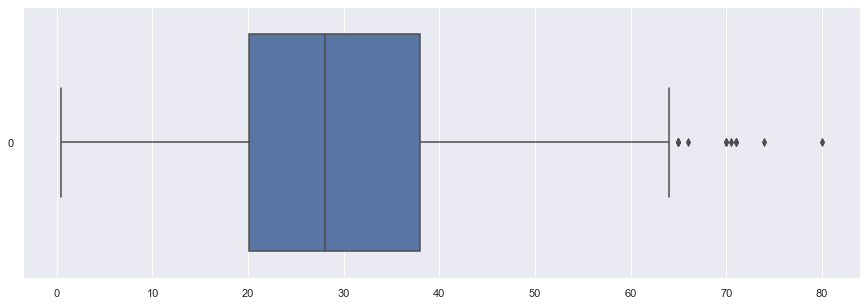

In [108]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['age'], orient="h")

In [69]:
# 4.6 Box plot for fare

<AxesSubplot:>

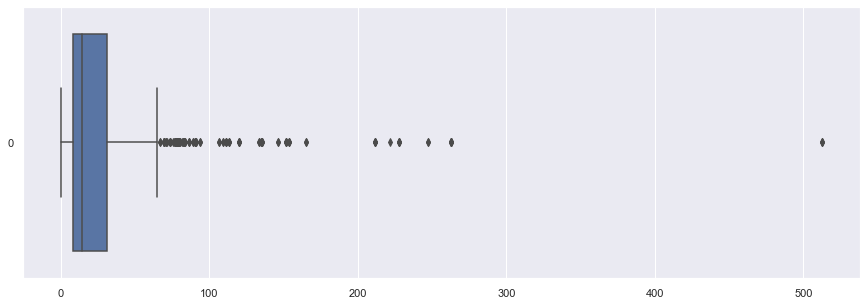

In [70]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['fare'], orient="h")

In [71]:
# 4.7 Box plot for class

<AxesSubplot:>

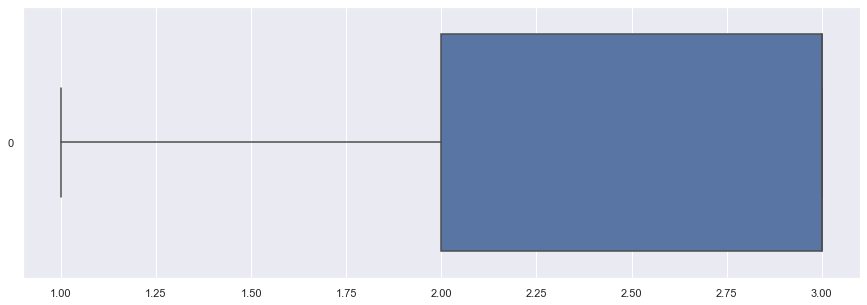

In [72]:
 sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['class'], orient="h")

In [76]:
# 5.0 Histogram and Distribution

In [77]:
# 5.1 Histogram and Distribution for survived

<AxesSubplot:xlabel='survived', ylabel='Count'>

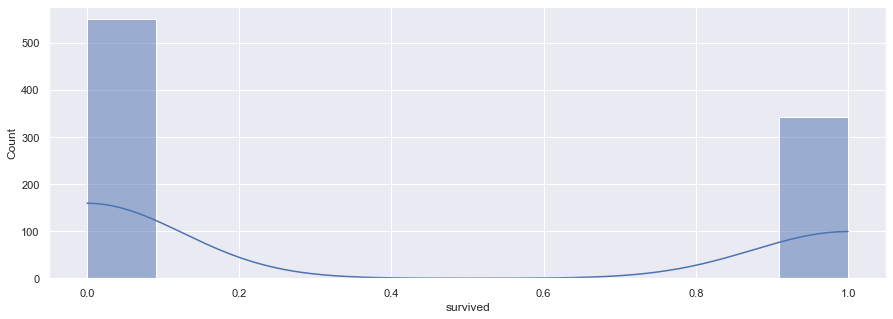

In [78]:
sns.histplot(data=df_numerical['survived'], kde=True)

In [79]:
# 5.2 Histogram and Distribution for pclass

<AxesSubplot:xlabel='pclass', ylabel='Count'>

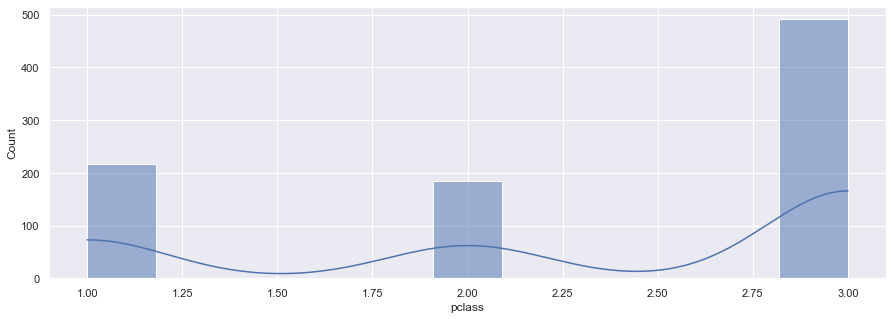

In [80]:
sns.histplot(data=df_numerical['pclass'], kde=True)

In [81]:
# 5.3 Histogram and Distribution for age

<AxesSubplot:xlabel='age', ylabel='Count'>

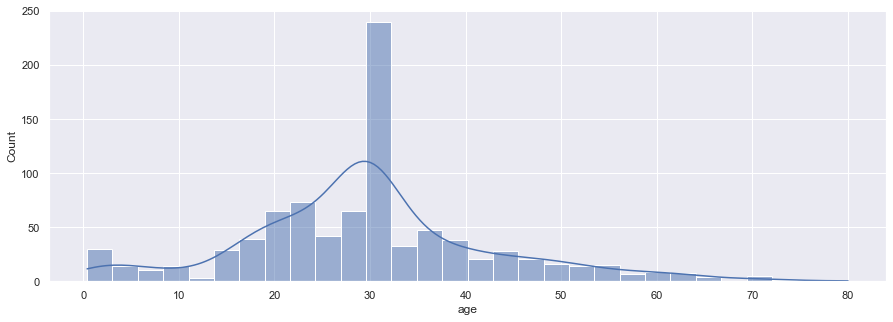

In [82]:
sns.histplot(data=df_numerical['age'], kde=True)

In [83]:
# sns.histplot(data=df_numerical['age'], kde=True)

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

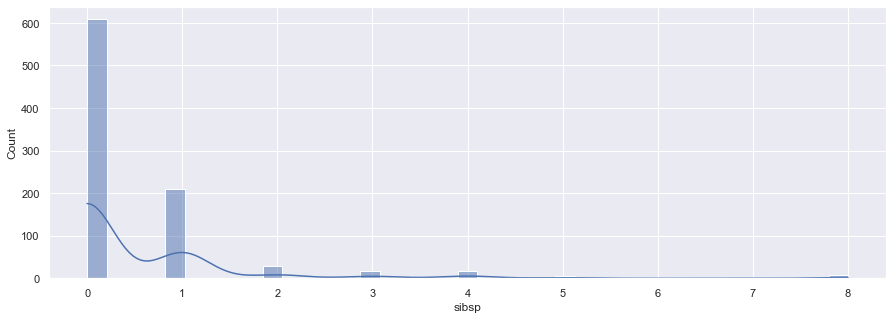

In [84]:
sns.histplot(data=df_numerical['sibsp'], kde=True)

In [85]:
# 5.5 Histogram and Distribution for parch

<AxesSubplot:xlabel='parch', ylabel='Count'>

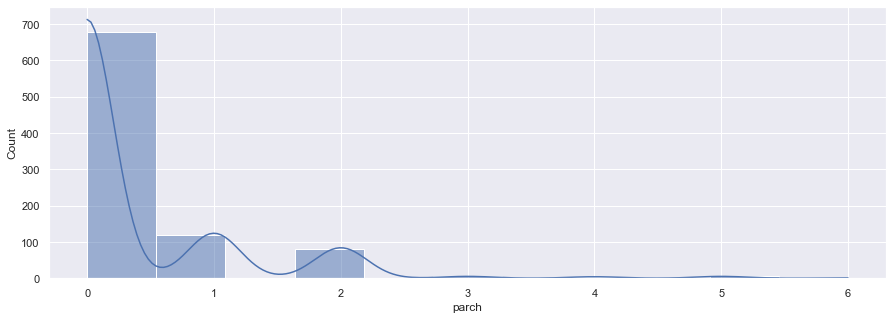

In [86]:
sns.histplot(data=df_numerical['parch'], kde=True)

In [87]:
# 5.6 Histogram and Distribution for fare

<AxesSubplot:xlabel='fare', ylabel='Count'>

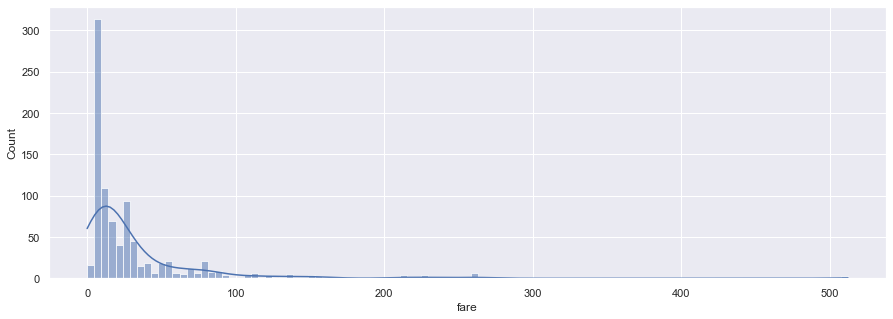

In [88]:
sns.histplot(data=df_numerical['fare'], kde=True)

In [89]:
# 5.7 Histogram and Distribution for class

<AxesSubplot:xlabel='class', ylabel='Count'>

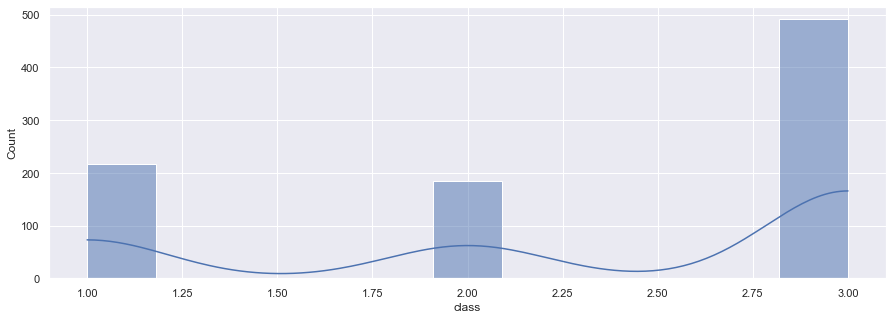

In [90]:
sns.histplot(data=df_numerical['class'], kde=True)

In [91]:
# 5.8 Histogram and Distribution for alone

<AxesSubplot:xlabel='alone', ylabel='Count'>

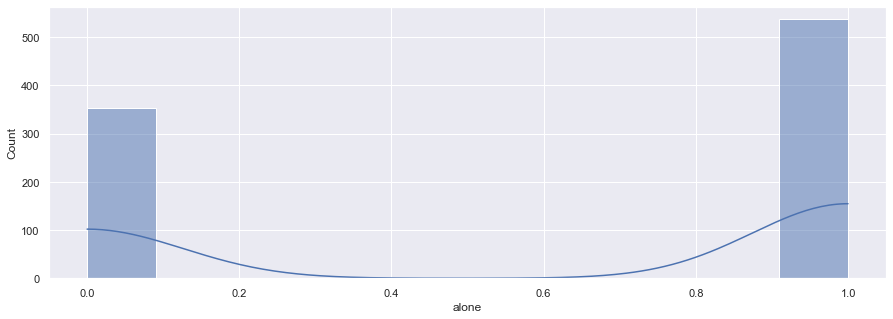

In [92]:
 sns.histplot(data=df_numerical['alone'], kde=True)

In [93]:
# 6.0 Standardization

In [94]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


In [95]:
# 6.1 standardization of dataset

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df_numerical))
print(scaler.transform(df_numerical))

StandardScaler()
[[-0.78927234  0.82737724 -0.5924806  ... -0.50244517  0.82737724
  -1.2316449 ]
 [ 1.2669898  -1.56610693  0.63878901 ...  0.78684529 -1.56610693
  -1.2316449 ]
 [ 1.2669898   0.82737724 -0.2846632  ... -0.48885426  0.82737724
   0.81192233]
 ...
 [-0.78927234  0.82737724  0.         ... -0.17626324  0.82737724
  -1.2316449 ]
 [ 1.2669898  -1.56610693 -0.2846632  ... -0.04438104 -1.56610693
   0.81192233]
 [-0.78927234  0.82737724  0.17706291 ... -0.49237783  0.82737724
   0.81192233]]


In [96]:
df_standard = (df_numerical - df_numerical.mean())/df_numerical.std()
df_standard.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,-0.788829,0.826913,-0.592148,0.432550,-0.473408,-0.502163,0.826913,-1.230954
1,1.266279,-1.565228,0.638430,0.432550,-0.473408,0.786404,-1.565228,-1.230954
2,1.266279,0.826913,-0.284503,-0.474279,-0.473408,-0.488580,0.826913,0.811467
3,1.266279,-1.565228,0.407697,0.432550,-0.473408,0.420494,-1.565228,-1.230954
4,-0.788829,0.826913,0.407697,-0.474279,-0.473408,-0.486064,0.826913,0.811467


In [97]:
# 6.2 mean and standard deviation of standardized dataset

In [98]:
round(df_standard.mean())

survived    0.0
pclass      0.0
age         0.0
sibsp       0.0
parch      -0.0
fare        0.0
class       0.0
alone       0.0
dtype: float64

In [99]:
df_standard.std()

survived    1.0
pclass      1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
class       1.0
alone       1.0
dtype: float64

In [100]:
# 6.3 kde plot of original dataset

<AxesSubplot:ylabel='Density'>

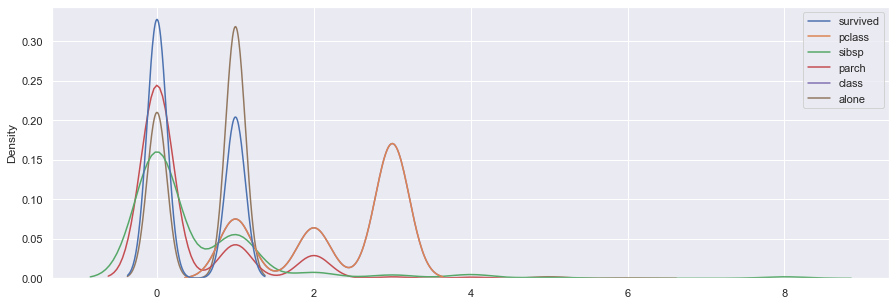

In [101]:
sns.kdeplot(data=df_numerical[['survived', 'pclass', 'sibsp', 'parch', 'class',
 'alone']])

<AxesSubplot:ylabel='Density'>

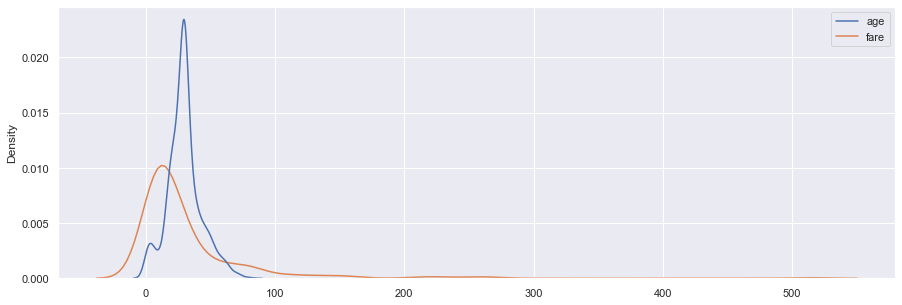

In [102]:
sns.kdeplot(data=df_numerical[['age', 'fare']])

In [103]:
# 6.4 kde plot of standardized dataset

<AxesSubplot:ylabel='Density'>

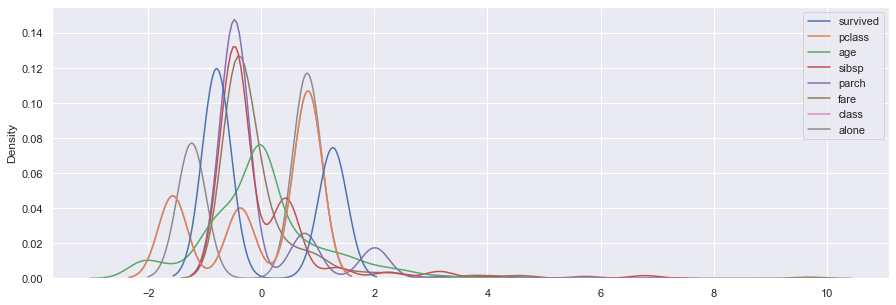

In [104]:
sns.kdeplot(data=df_standard)

In [105]:
# 7.0 Normalization

In [106]:
# Using MinMax Scalar

In [107]:
# Note: using MinMax Scalar the data range will be 0 to 1.

In [108]:
 df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


In [109]:
# 7.1 normalization of dataset

In [89]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df_numerical))
a=scaler.transform(df_numerical)
a
pd.DataFrame(a)

MinMaxScaler()


,0,1,2,3,4,5,6,7
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.5,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,1.0
888,0.0,1.0,0.367921,0.125,0.333333,0.045771,1.0,0.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0


In [110]:
df_normal = (df_numerical - df_numerical.min())/(df_numerical.max() - df_numerical.min())
df_normal.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,1.0


In [111]:
# 7.2 min, max, mean and standard deviation of normalized dataset

In [112]:
df_normal.min()

survived    0.0
pclass      0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
class       0.0
alone       0.0
dtype: float64

In [113]:
df_normal.max()

survived    1.0
pclass      1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
class       1.0
alone       1.0
dtype: float64

In [114]:
df_normal.mean()

survived    0.383838
pclass      0.654321
age         0.367921
sibsp       0.065376
parch       0.063599
fare        0.062858
class       0.654321
alone       0.602694
dtype: float64

In [115]:
df_normal.std()

survived    0.486592
pclass      0.418036
age         0.163383
sibsp       0.137843
parch       0.134343
fare        0.096995
class       0.418036
alone       0.489615
dtype: float64

In [116]:
# 7.3 kde plot of original dataset

<AxesSubplot:ylabel='Density'>

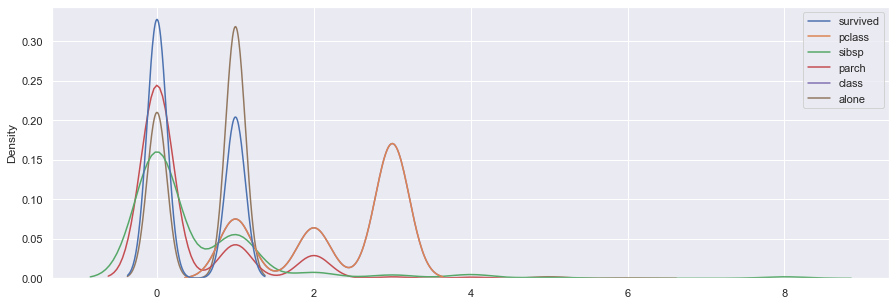

In [117]:
 sns.kdeplot(data=df_numerical[['survived', 'pclass', 'sibsp', 'parch', 'class',
 'alone']])


<AxesSubplot:ylabel='Density'>

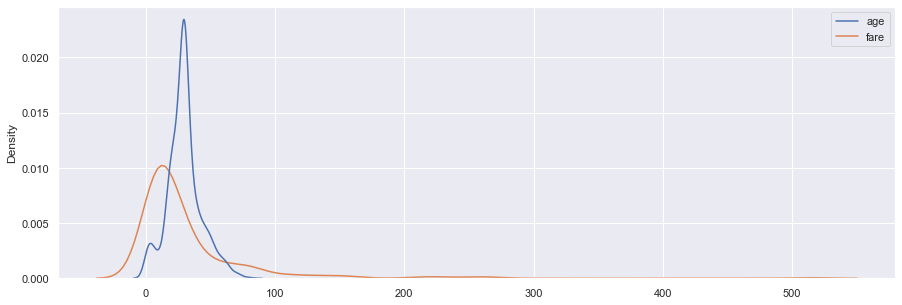

In [118]:
sns.kdeplot(data=df_numerical[['age', 'fare']])

In [119]:
# 7.4 kde plot of normalized dataset

<AxesSubplot:ylabel='Density'>

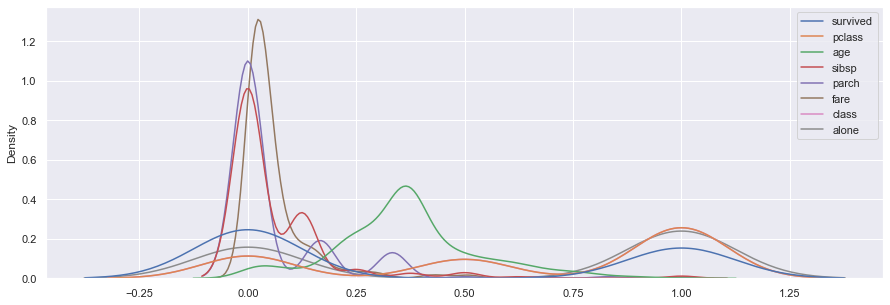

In [120]:
sns.kdeplot(data=df_normal)

In [121]:
# 8.0 Central Limit Theorem

In [123]:
# The Central Limit Theorem(CLT) states that for any data, provided a high number of samples have been taken. The following properties hold:
# 1. Sampling Distribution Mean(μₓ¯) = Population Mean(μ)
# 2. Sampling distribution’s standard deviation (Standard error) = σ/√n ≈S/√n
# 3. For n > 30, the sampling distribution becomes a normal distribution.

In [124]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


In [125]:
# 8.1 For survived column

In [126]:
# 8.1.1 Population Mean and Standard Deviation

In [129]:
mean_pop_survived = df_numerical['survived'].mean()
std_pop_survived = df_numerical['survived'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_survived,std_pop_survived))

population mean (μ): 0.3838383838383838
population standard deviation (σ): 0.4865924542648585


In [130]:
# 8.1.2 histplot

<AxesSubplot:xlabel='survived', ylabel='Count'>

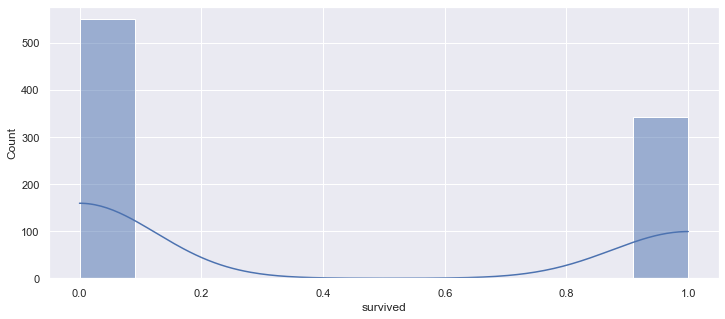

In [131]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['survived'], kde=True)

In [132]:
# 8.1.3 Verifying CLT

In [133]:
# 8.1.3.1 Keeping No. of Samples Constant

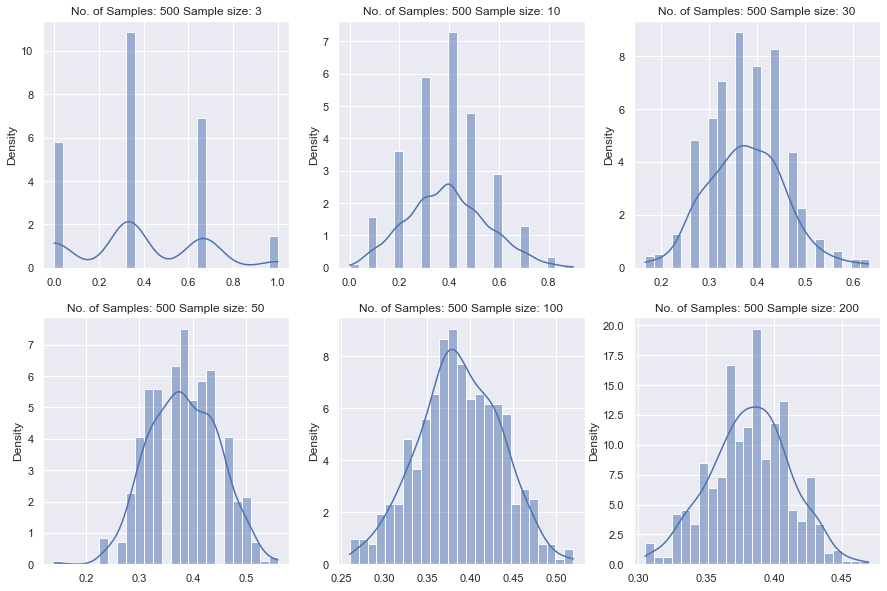

In [134]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.survived.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [135]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.38666666666666694
0.3920000000000006
0.3772666666666681
0.38315999999999967
0.3870800000000004
0.38231999999999977


In [136]:
# 8.1.3.2 Keeping Samples Size Constant

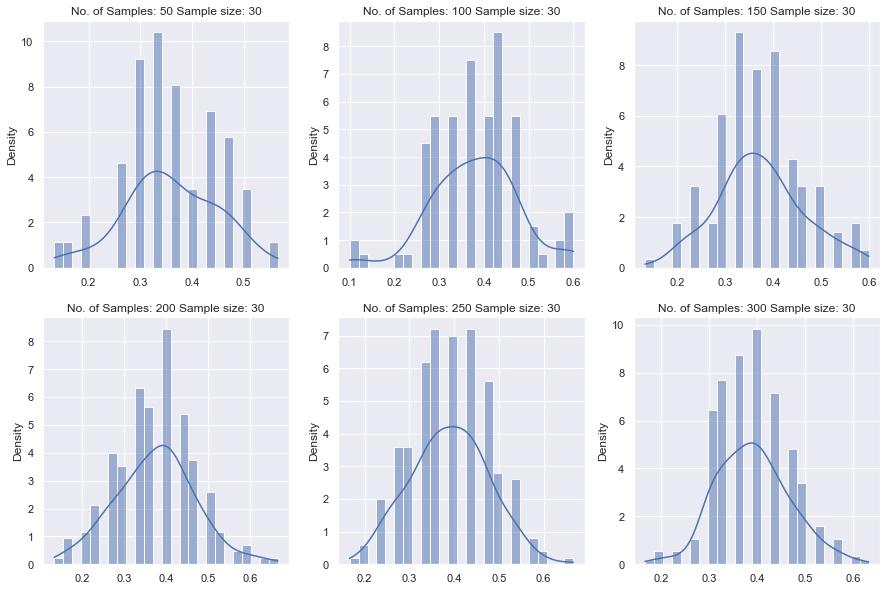

In [137]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.survived.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [138]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.35866666666666674
0.38100000000000006
0.37377777777777776
0.37483333333333296
0.39026666666666654
0.3921111111111105


In [139]:
# 8.2 For pclass column

In [140]:
# 8.2.1 Population Mean and Standard Deviation

In [142]:
mean_pop_pclass = df_numerical['pclass'].mean()
std_pop_pclass = df_numerical['pclass'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_pclass,std_pop_pclass))

population mean (μ): 2.308641975308642
population standard deviation (σ): 0.8360712409770513


In [143]:
# 8.2.2 histplot

<AxesSubplot:xlabel='pclass', ylabel='Count'>

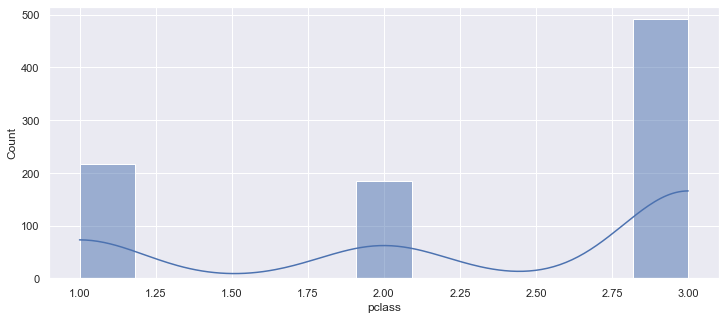

In [144]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['pclass'], kde=True)

In [145]:
# 8.2.3 Verifying CLT

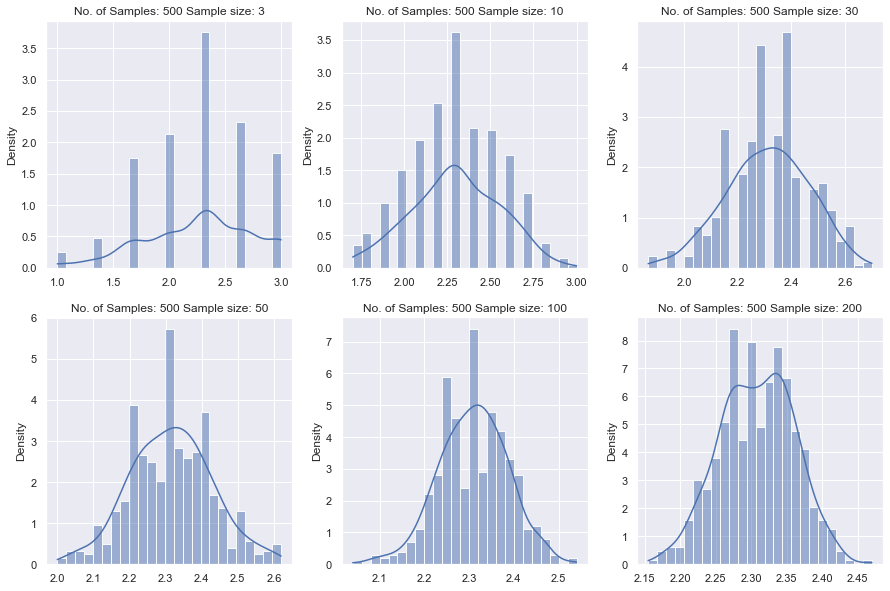

In [146]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.pclass.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [147]:
for i in list_sample_means:
 print(pd.Series(i).mean())

2.2779999999999996
2.2977999999999987
2.311399999999999
2.3159599999999996
2.309299999999997
2.3080099999999995


In [148]:
# 8.2.3.2 Keeping Samples Size Constant

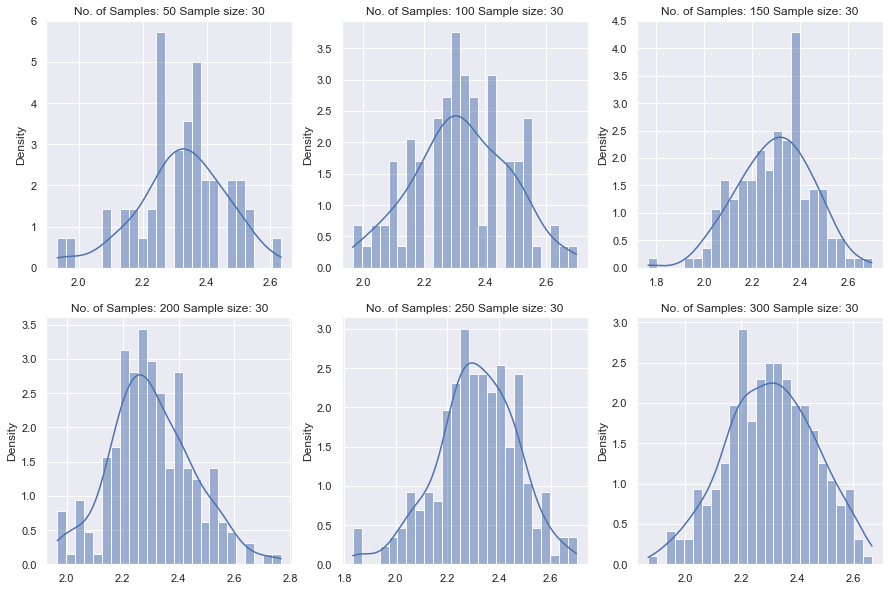

In [149]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.pclass.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [150]:
for i in list_sample_means:
 print(pd.Series(i).mean())

2.320666666666666
2.3223333333333334
2.294666666666666
2.3021666666666656
2.3122666666666656
2.3040000000000034


In [151]:
# 8.3 For age column

In [152]:
# 8.3.1 Population Mean and Standard Deviation

In [153]:
mean_pop_age = df_numerical['age'].mean()
std_pop_age = df_numerical['age'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_age,std_pop_age))

population mean (μ): 29.699117647058763
population standard deviation (σ): 13.002015226002884


In [154]:
# 8.3.2 histplot

<AxesSubplot:xlabel='age', ylabel='Count'>

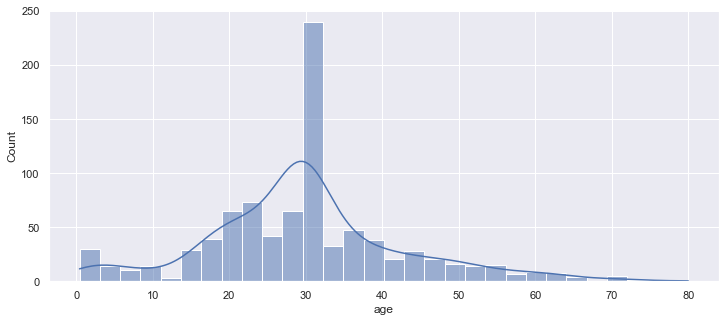

In [155]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['age'], kde=True)

In [156]:
# 8.3.3 Verifying CLT

In [157]:
# 8.3.3.1 Keeping No. of Samples Constant

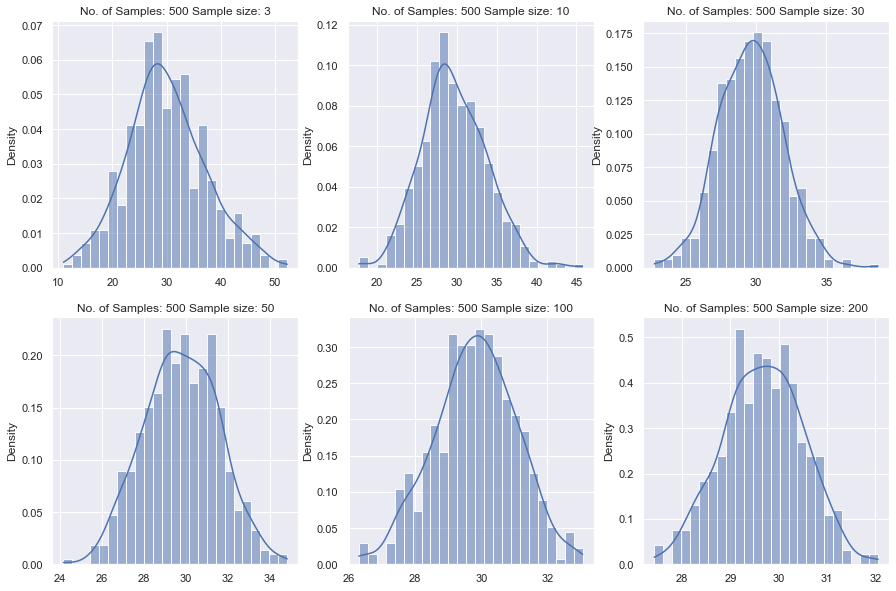

In [158]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.age.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [159]:
for i in list_sample_means:
 print(pd.Series(i).mean())

29.983504509803918
29.7005336470588
29.635201058823547
29.79402110588232
29.820349994117663
29.6704362029412


In [160]:
# 8.3.3.2 Keeping Samples Size Constant

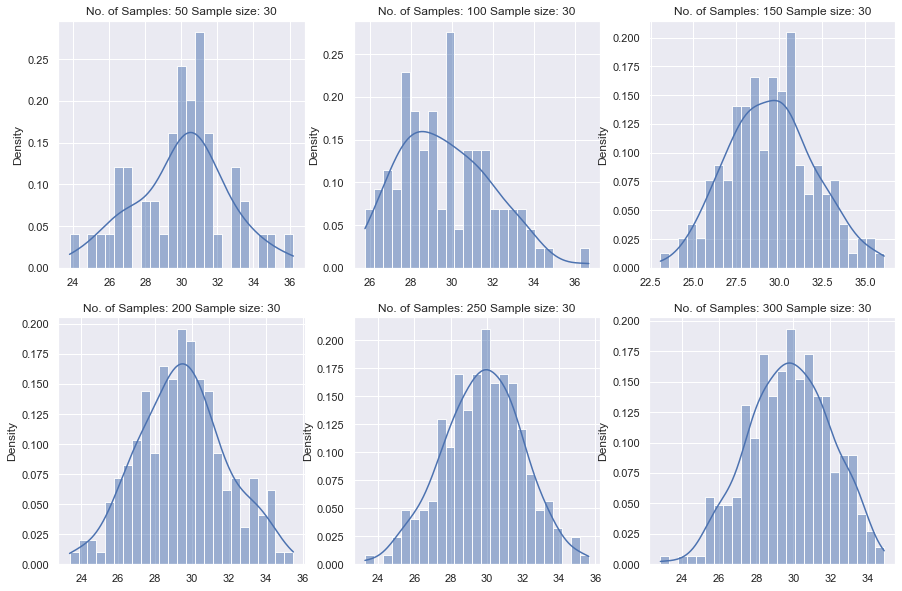

In [161]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.age.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [162]:
for i in list_sample_means:
 print(pd.Series(i).mean())

30.01651725490197
29.6949643137255
29.532647581699347
29.458131715686292
29.76918662745098
29.78266196078431


In [163]:
# 8.4 For sibsp column

In [164]:
# 8.4.1 Population Mean and Standard Deviation

In [165]:
mean_pop_sibsp = df_numerical['sibsp'].mean()
std_pop_sibsp = df_numerical['sibsp'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_sibsp,std_pop_sibsp))

population mean (μ): 0.5230078563411896
population standard deviation (σ): 1.1027434322934275


In [166]:
# 8.4.2 histplot

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

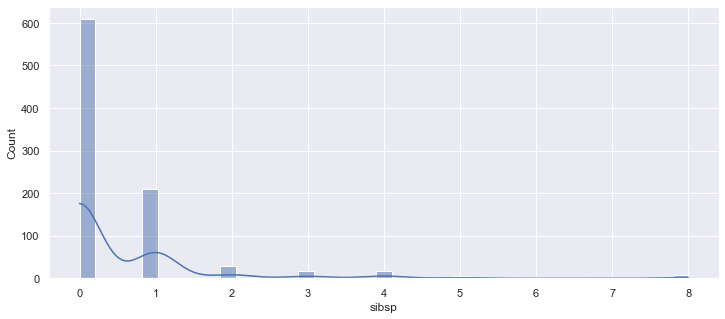

In [167]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['sibsp'], kde=True)

In [168]:
# 8.4.3 Verifying CLT

In [169]:
# 8.4.3.1 Keeping No. of Samples Constant

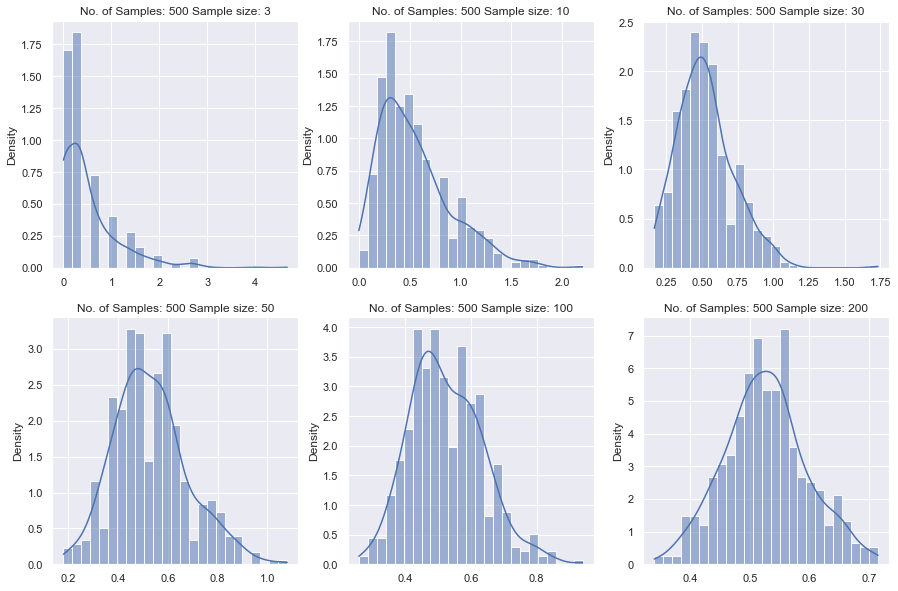

In [170]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.sibsp.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [171]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.511333333333334
0.5453999999999997
0.5262000000000002
0.5306400000000003
0.5252199999999999
0.5262900000000001


In [172]:
# 8.4.3.2 Keeping Samples Size Constant

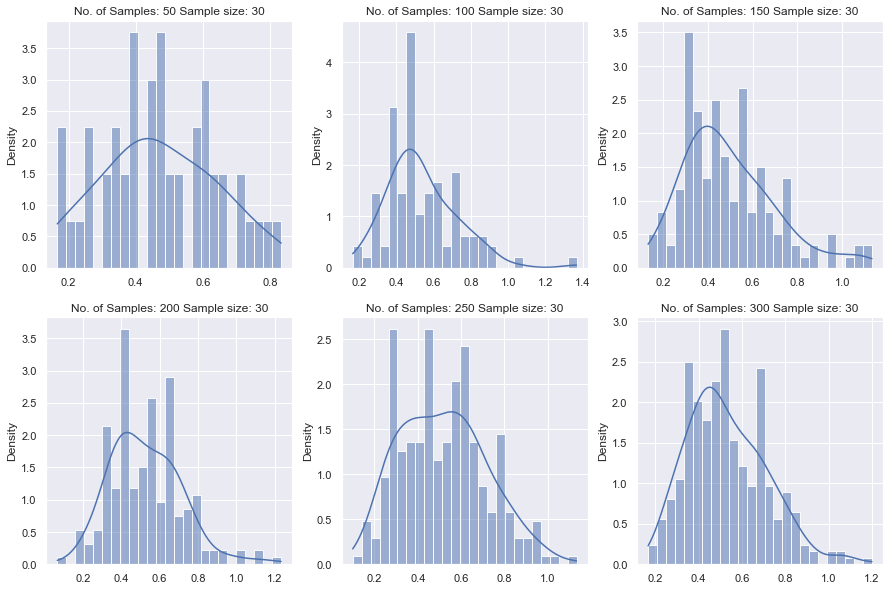

In [173]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.sibsp.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [174]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.4686666666666667
0.5366666666666667
0.4946666666666667
0.5265000000000001
0.5182666666666665
0.5310000000000002


In [175]:
# 8.5 For parch column

In [176]:
# 8.5.1 Population Mean and Standard Deviation

In [177]:
mean_pop_parch = df_numerical['parch'].mean()
std_pop_parch = df_numerical['parch'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_parch,std_pop_parch))

population mean (μ): 0.38159371492704824
population standard deviation (σ): 0.8060572211299559


In [178]:
# 8.5.2 histplot

<AxesSubplot:xlabel='parch', ylabel='Count'>

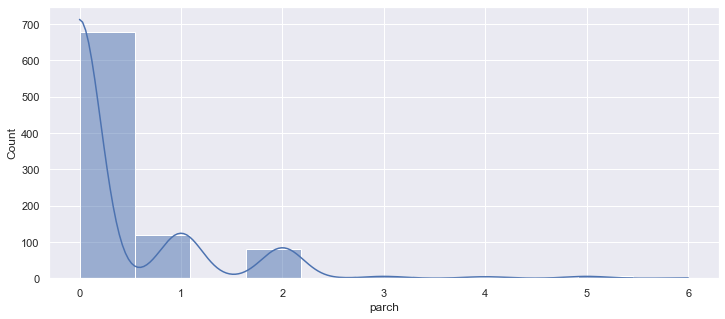

In [179]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['parch'], kde=True)

In [180]:
# 8.5.3 Verifying CLT

In [181]:
# 8.5.3.1 Keeping No. of Samples Constant

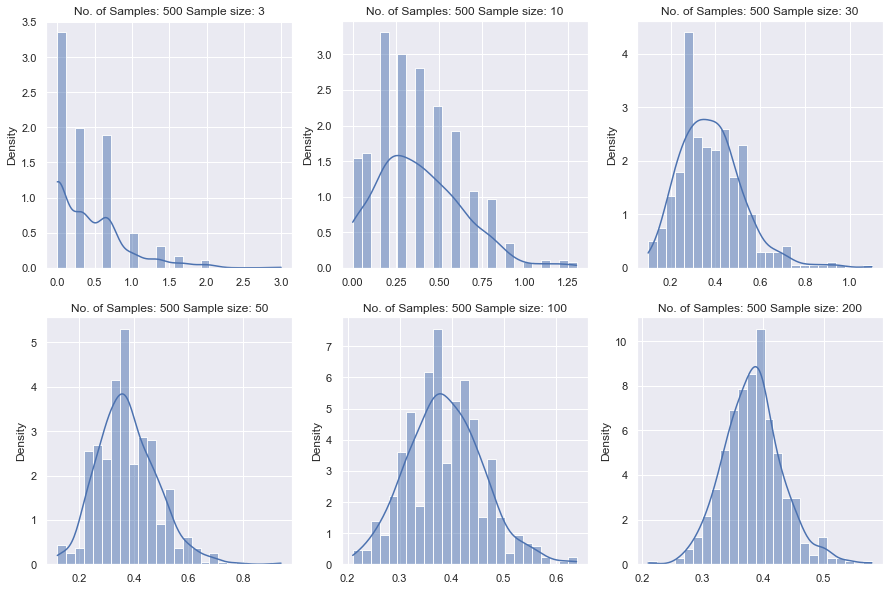

In [182]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.parch.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [183]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.4079999999999999
0.3853999999999999
0.38093333333333385
0.3767200000000005
0.3874399999999998
0.38318000000000024


In [184]:
# 8.5.3.2 Keeping Samples Size Constant

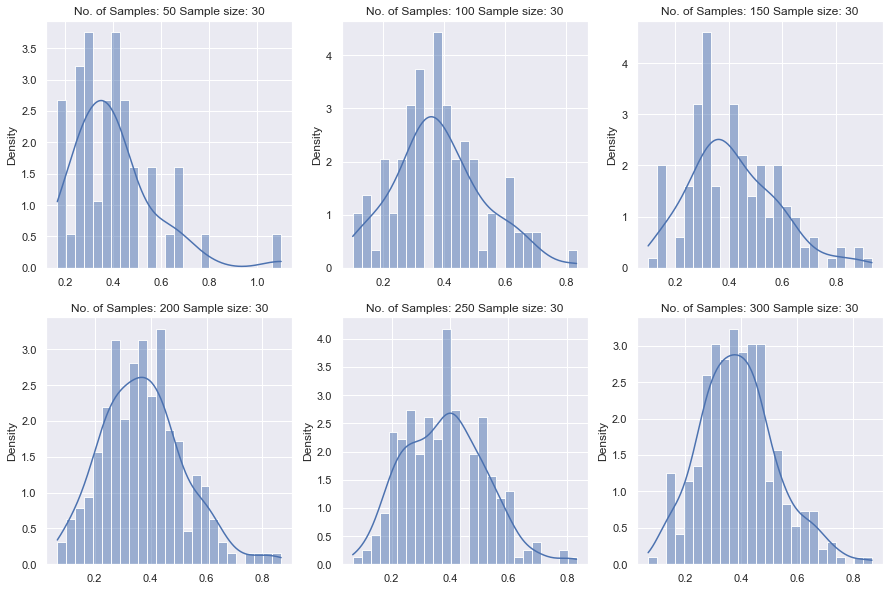

In [185]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.parch.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [186]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.39866666666666684
0.3816666666666667
0.41422222222222216
0.37200000000000005
0.38173333333333326
0.38933333333333325


In [187]:
# 8.6 for fare column

In [188]:
# 8.6.1 Population Mean and Standard Deviation

In [189]:
mean_pop_fare = df_numerical['fare'].mean()
std_pop_fare = df_numerical['fare'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_fare,std_pop_fare))

population mean (μ): 32.2042079685746
population standard deviation (σ): 49.693428597180905


In [190]:
# 8.6.2 histplot

<AxesSubplot:xlabel='fare', ylabel='Count'>

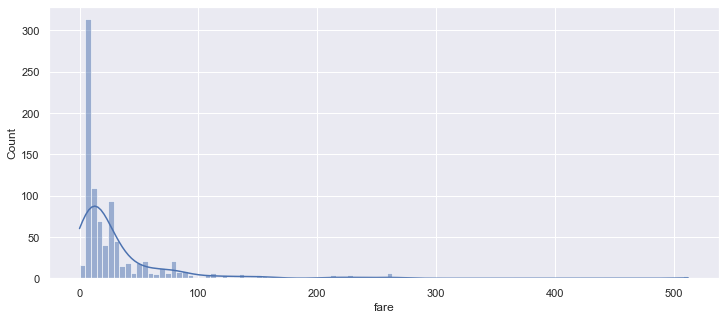

In [191]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['fare'], kde=True)

In [192]:
# 8.6.3 Verifying CLT

In [193]:
# 8.6.3.1 Keeping No. of Samples Constant

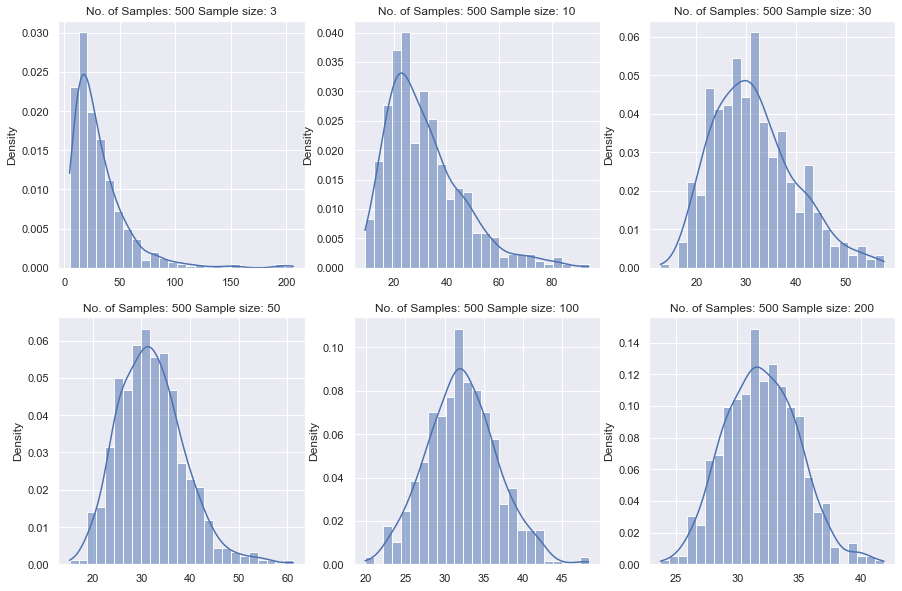

In [194]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.fare.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [195]:
for i in list_sample_means:
 print(pd.Series(i).mean())

31.358896199999993
31.55492542000003
31.605677160000003
32.08059613199998
32.229530915999995
31.98044242400002


In [196]:
# 8.6.3.2 Keeping Samples Size Constant

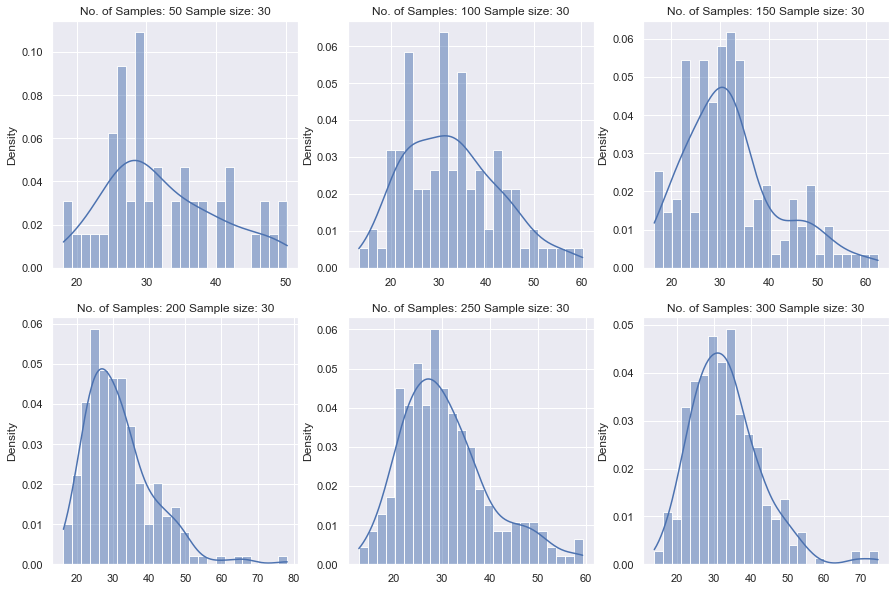

In [197]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.fare.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [198]:
for i in list_sample_means:
 print(pd.Series(i).mean())

32.32764953333333
32.84277870000001
32.26070368888889
31.70250559999999
30.718387306666667
33.246790577777794


In [199]:
# 8.7 for class column

In [200]:
# 8.7.1 Population Mean and Standard Deviation

In [201]:
mean_pop_class = df_numerical['class'].mean()
std_pop_class = df_numerical['class'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_class,std_pop_class))

population mean (μ): 2.308641975308642
population standard deviation (σ): 0.8360712409770513


In [202]:
# 8.7.2 histplot

<AxesSubplot:xlabel='class', ylabel='Count'>

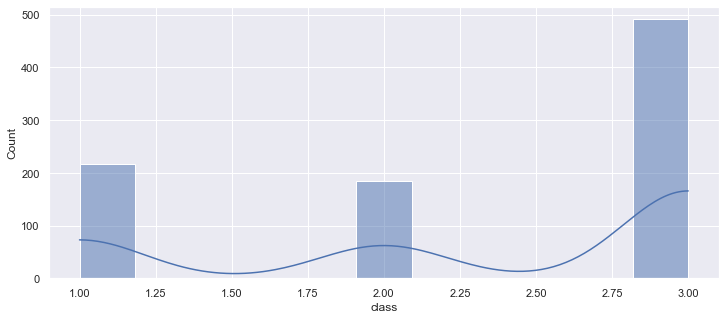

In [203]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['class'], kde=True)

In [204]:
# 8.7.3 Verifying CLT

In [205]:
# 8.7.3.1 Keeping No. of Samples Constant

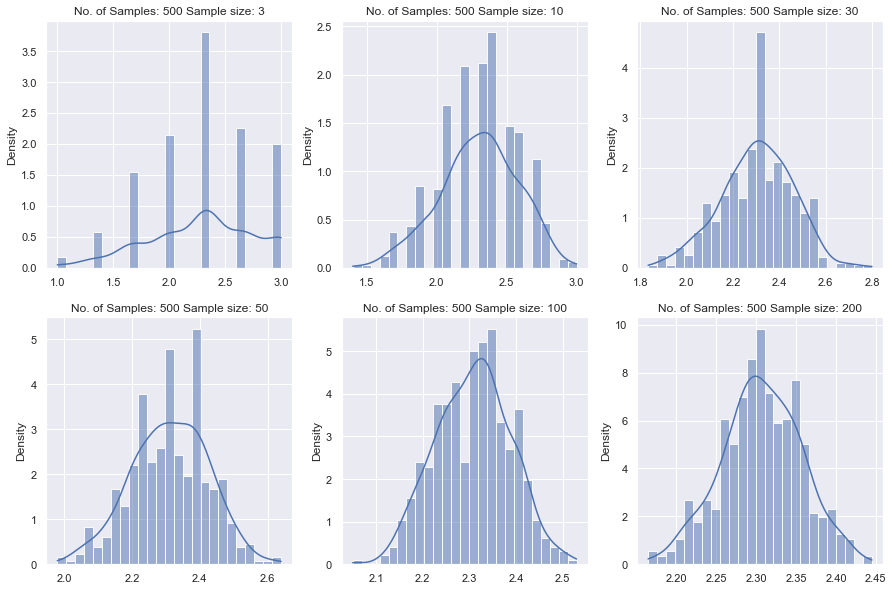

In [206]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical['class'].sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [207]:
for i in list_sample_means:
 print(pd.Series(i).mean())

2.2953333333333332
2.3019999999999987
2.3031999999999995
2.3112400000000015
2.3081399999999985
2.3068799999999996


In [208]:
# 8.7.3.2 Keeping Samples Size Constant

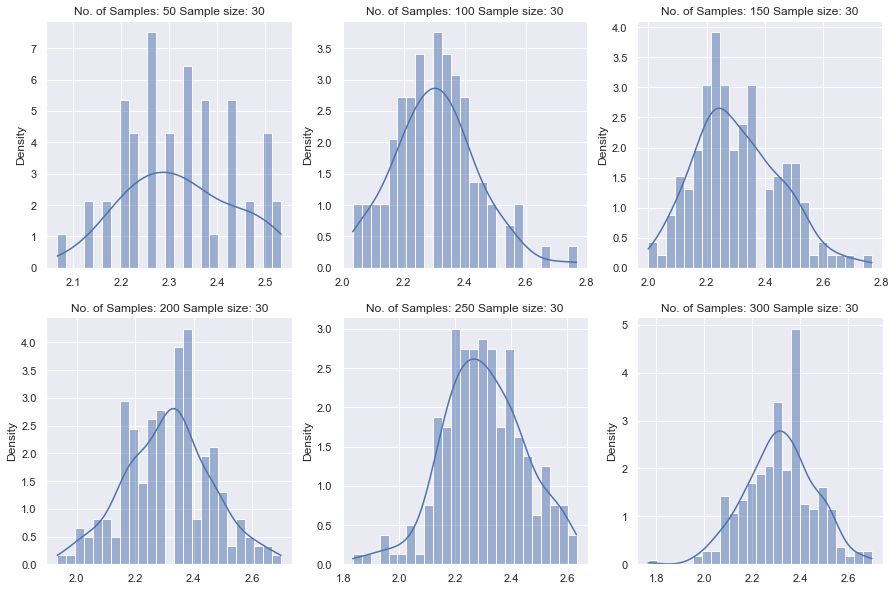

In [209]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical['class'].sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [210]:
for i in list_sample_means:
 print(pd.Series(i).mean())

2.3213333333333335
2.305666666666667
2.306000000000001
2.3125000000000013
2.3042666666666665
2.3173333333333326


In [211]:
# 8.8 for alone column

In [212]:
# 8.8.1 Population Mean and Standard Deviation

In [214]:
mean_pop_alone = df_numerical['alone'].mean()
std_pop_alone = df_numerical['alone'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_alone,std_pop_alone))

population mean (μ): 0.6026936026936027
population standard deviation (σ): 0.4896152299826277


In [215]:
# 8.8.2 histplot

<AxesSubplot:xlabel='alone', ylabel='Count'>

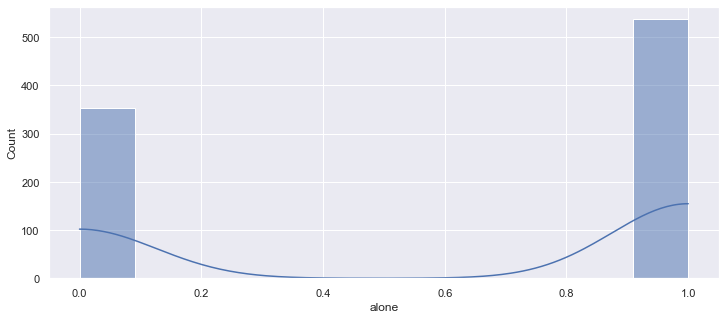

In [216]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['alone'], kde=True)

In [218]:
# 8.8.3 Verifying CLT

In [219]:
# 8.8.3.1 Keeping No. of Samples Constant

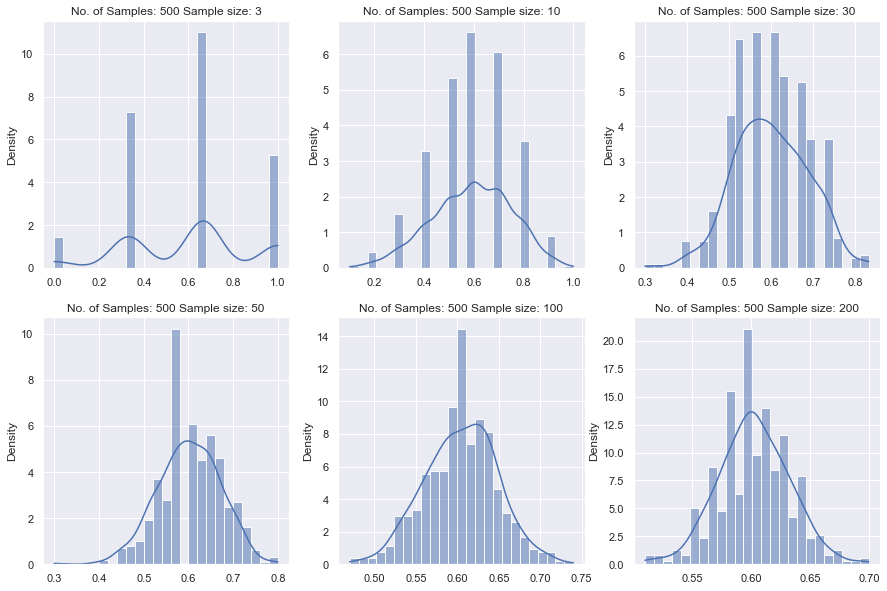

In [220]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.alone.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [221]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.600666666666666
0.591399999999999
0.6009333333333323
0.6006399999999992
0.6044599999999994
0.6024299999999999


In [222]:
# 8.8.3.2 Keeping Samples Size Constant

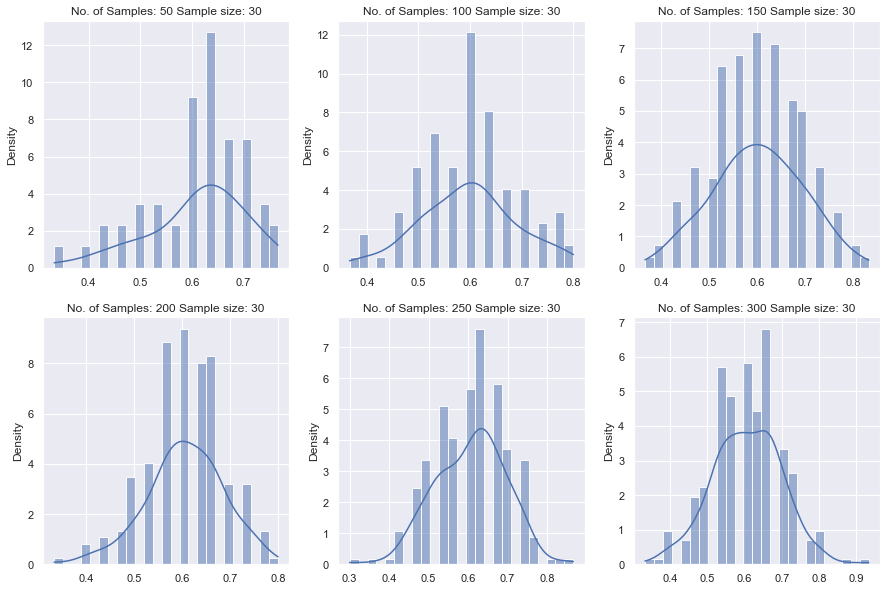

In [224]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.alone.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [225]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.6093333333333333
0.5973333333333334
0.6017777777777777
0.6065000000000006
0.6063999999999997
0.6066666666666654


In [227]:
# 9.0 Covariance, Pearson correlation coefficient, Spearman's rank
# correlation coefficient

In [228]:
# 9.1 Covarience

In [229]:
df_numerical.cov()

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,0.236772,-0.137703,-0.441656,-0.018954,0.032017,6.221787,-0.137703,-0.048451
pclass,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196,0.699015,0.055347
age,-0.441656,-3.601855,169.052400,-3.335345,-1.877987,59.162200,-3.601855,1.144445
sibsp,-0.018954,0.076599,-3.335345,1.216043,0.368739,8.748734,0.076599,-0.315568
parch,0.032017,0.012429,-1.877987,0.368739,0.649728,8.661052,0.012429,-0.230242
fare,6.221787,-22.830196,59.162200,8.748734,8.661052,2469.436846,-22.830196,-6.613861
class,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196,0.699015,0.055347
alone,-0.048451,0.055347,1.144445,-0.315568,-0.230242,-6.613861,0.055347,0.239723


In [230]:
# 9.2 Pearson correlation coefficient

In [231]:
df_numerical.corr("pearson")

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.338481,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,1.000000,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.331339,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.083081,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.018443,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.549500,-0.271832
class,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,1.000000,0.135207
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.135207,1.000000


In [232]:
# 9.3 Spearman's rank correlation coefficient

In [233]:
df_numerical.corr("spearman")#

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736,-0.339668,-0.203367
pclass,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032,1.000000,0.135896
age,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847,-0.308875,0.141379
sibsp,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113,-0.043019,-0.828215
parch,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074,-0.022801,-0.683719
fare,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000,-0.688032,-0.531472
class,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032,1.000000,0.135896
alone,-0.203367,0.135896,0.141379,-0.828215,-0.683719,-0.531472,0.135896,1.000000


In [234]:
# 9.4 Pairplot for titanic dataset

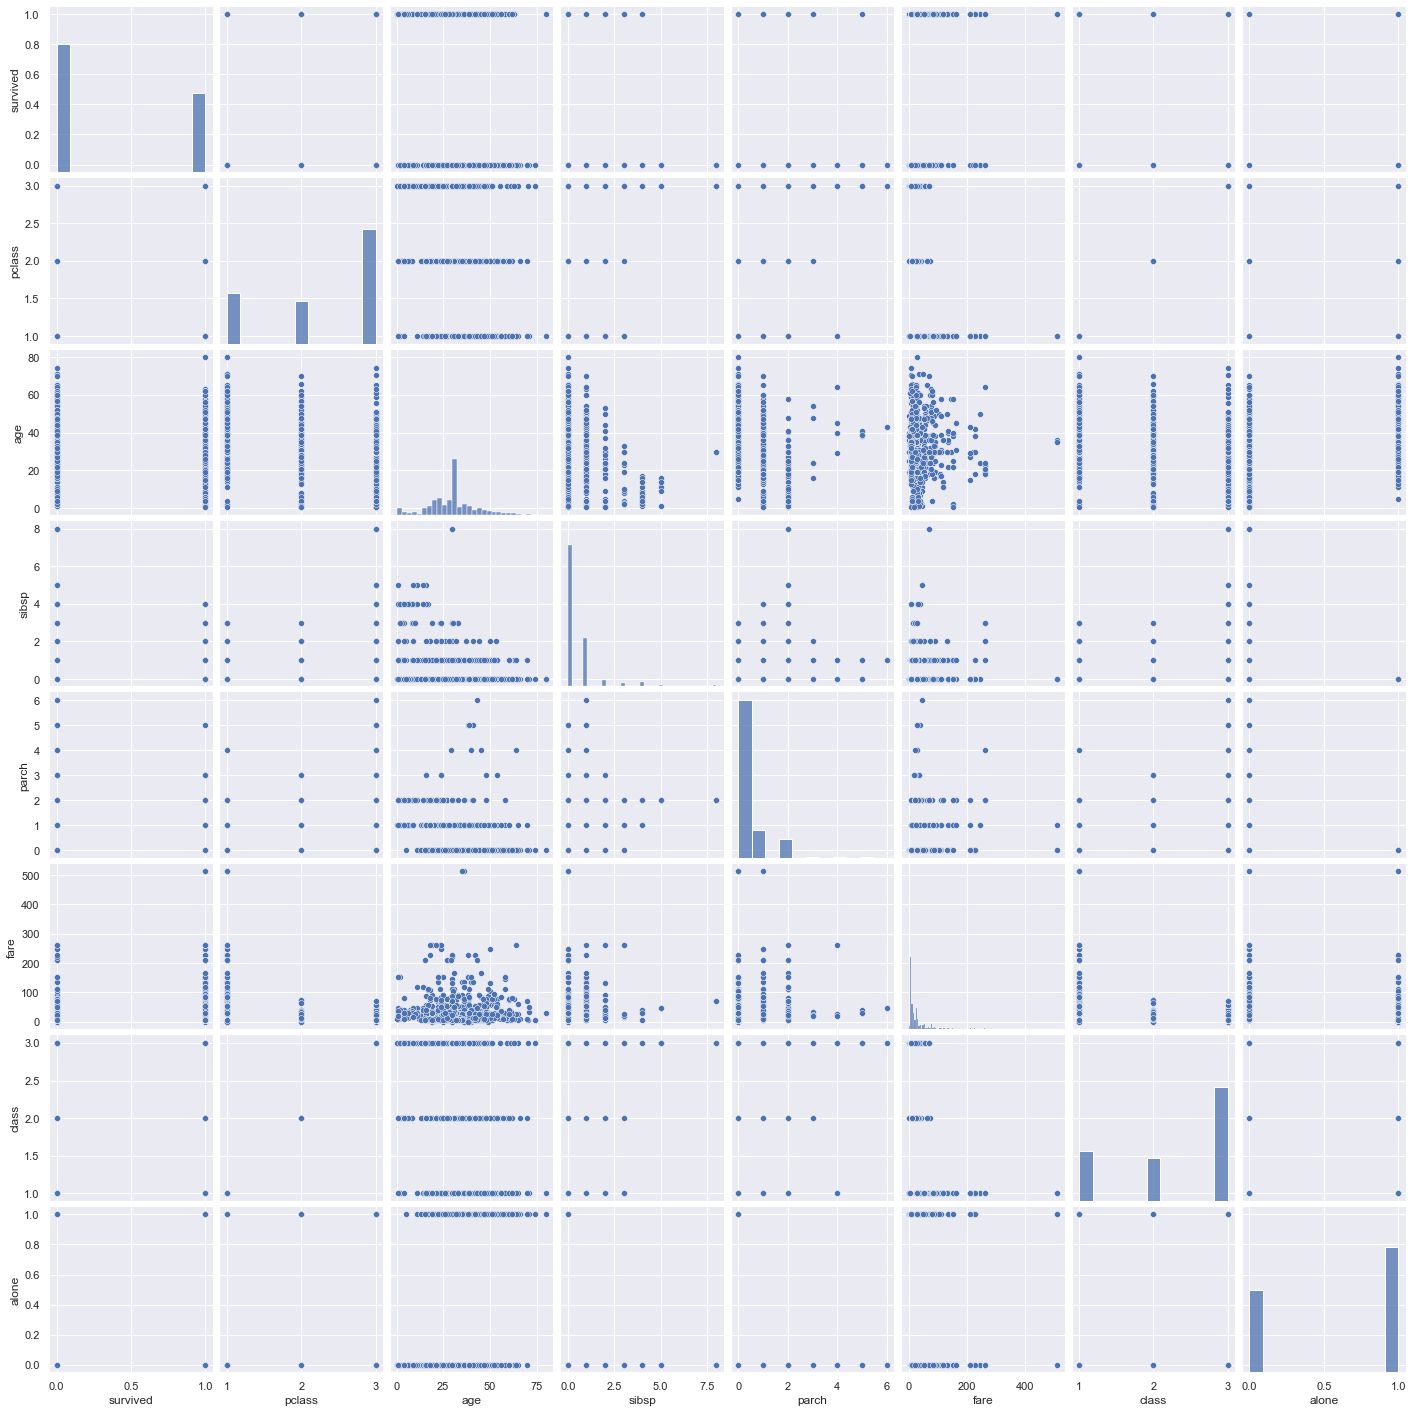

In [235]:
sns.set(rc={'figure.figsize':(25,25)})
sns.pairplot(df_numerical, height=2.5)

In [236]:
# 9.5 Pairplot for titanic dataset with kde

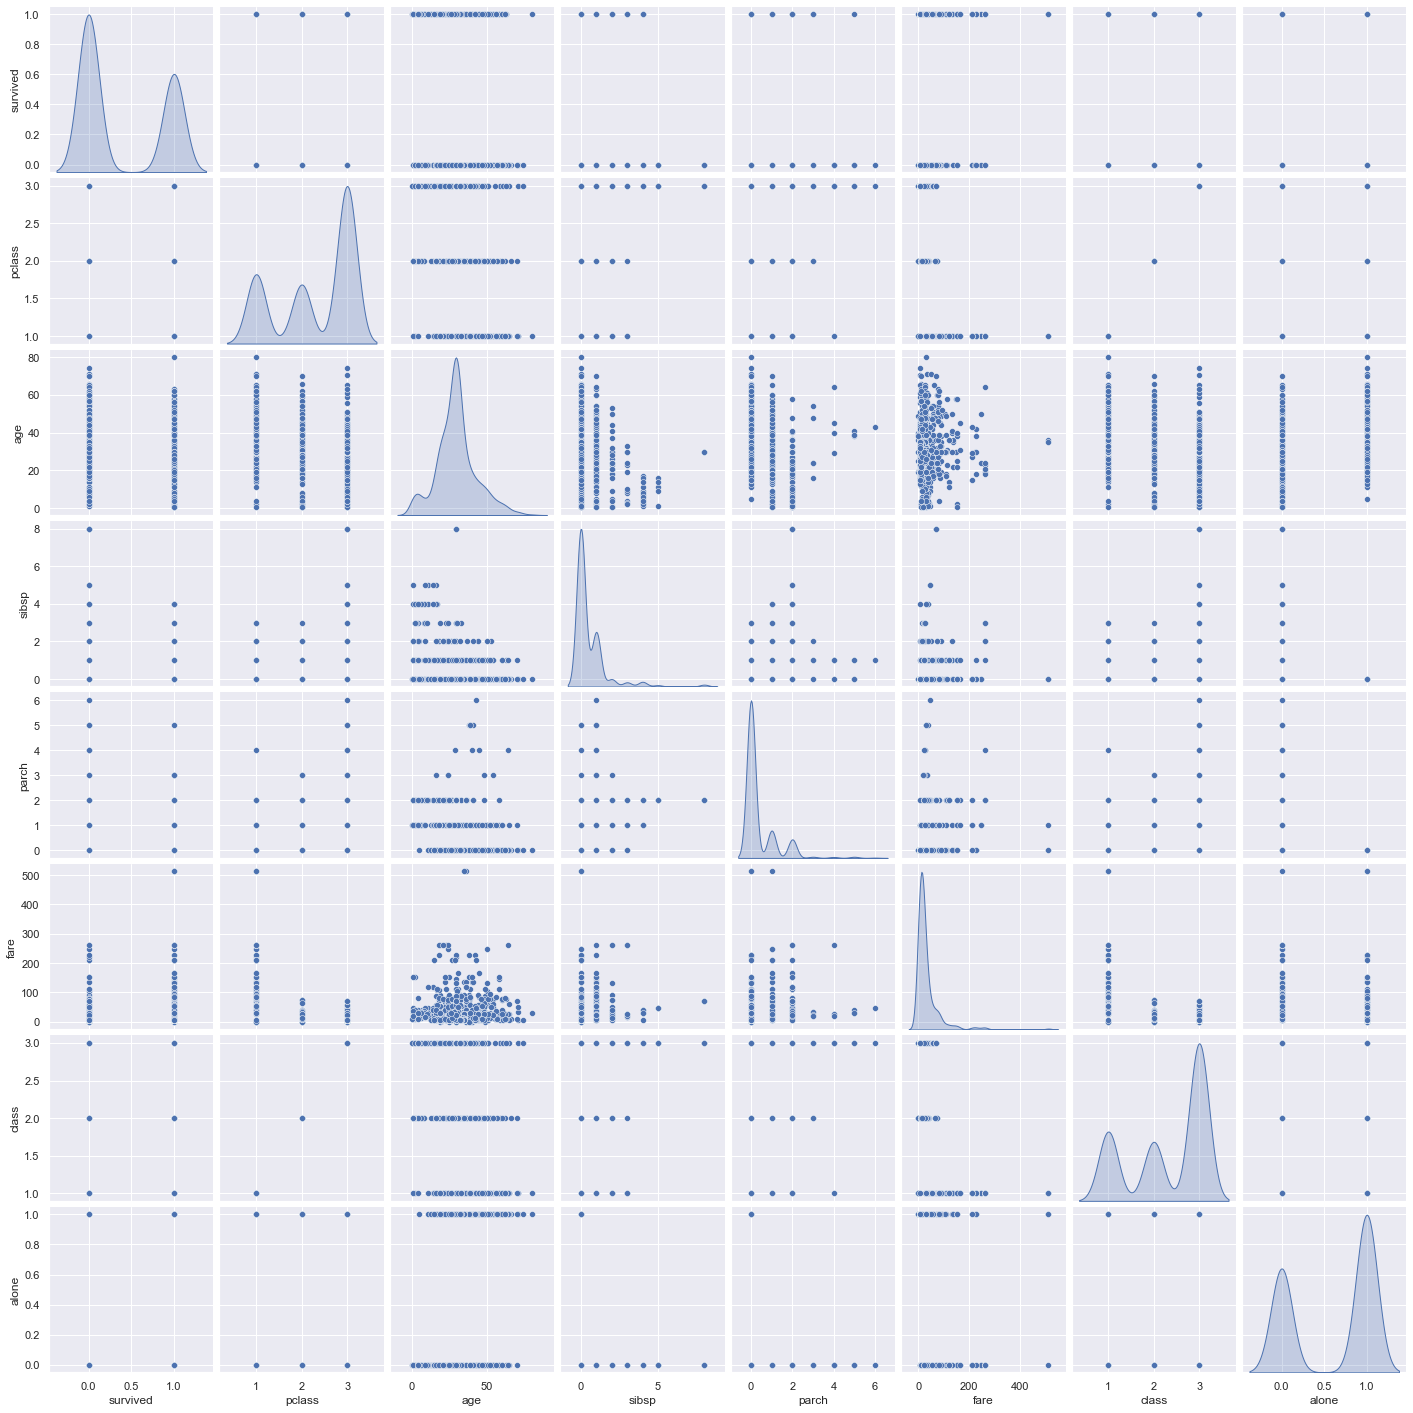

In [237]:
sns.set(rc={'figure.figsize':(25,25)})
sns.pairplot(df_numerical, height=2.5,diag_kind="kde")